# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#study_data_complete.duplicated()
study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]

#not sure where the array is coming from in starter code

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = study_data_complete[(study_data_complete["Mouse ID"] == "g989")]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop(duplicate_mouse.index)
#.drop_duplicates(["Mouse ID", "Timepoint"])
study_data_clean
# look at zoom chat
#.drop(duplicate_mouse)
#https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = study_data_clean["Mouse ID"].nunique()
mouse_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_mean = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_variance = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_std = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_stats = pd.DataFrame({"Mean": drug_regimen_mean,
                                   "Median": drug_regimen_median, 
                                   "Variance": drug_regimen_variance, 
                                   "Standard Deviation": drug_regimen_std, 
                                   "SEM": drug_regimen_sem})

drug_regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(("mean", "median", "var", "std", "sem"))
drug_regimen_agg                                                                                        

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

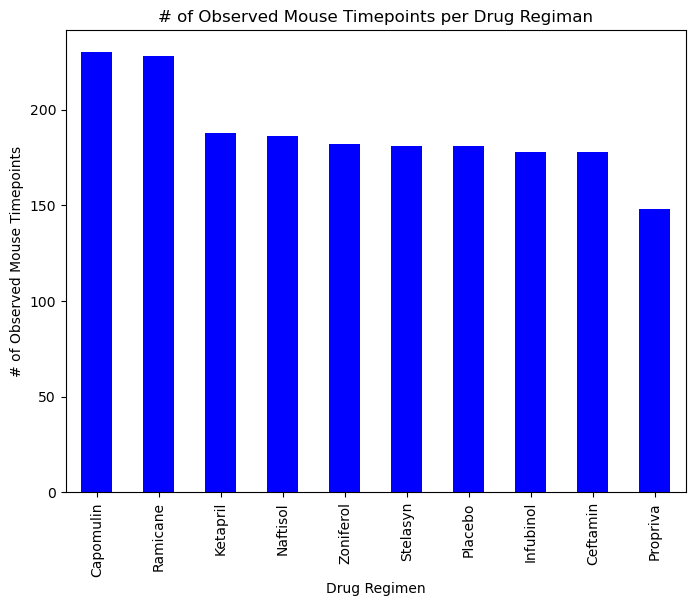

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_of_observations = study_data_clean["Drug Regimen"].value_counts()

observations_chart_pandas = number_of_observations.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                                  title="# of Observed Mouse Timepoints per Drug Regiman",
                                                  xlabel="Drug Regimen",
                                                  ylabel="# of Observed Mouse Timepoints")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Propriva'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

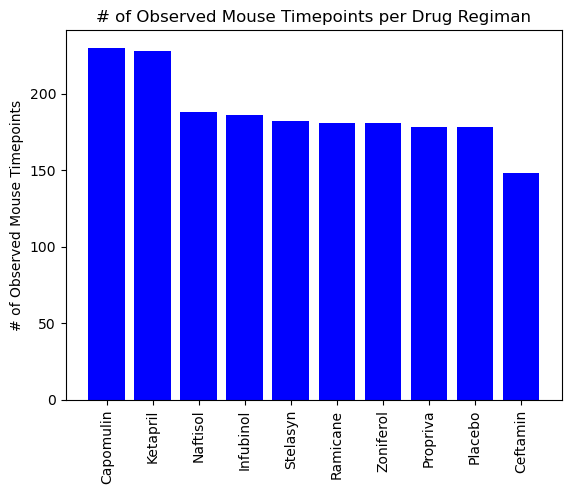

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_of_observations = study_data_clean["Drug Regimen"].value_counts()
drugs = study_data_clean["Drug Regimen"].unique()

x_axis = drugs
y_axis = number_of_observations
plt.bar(x_axis, y_axis, color='b', alpha=1)




plt.title("# of Observed Mouse Timepoints per Drug Regiman")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)


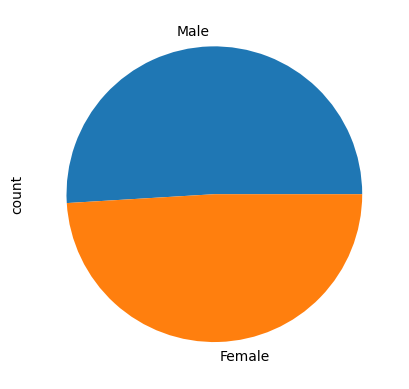

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = study_data_clean["Sex"].value_counts()
sex_chart_pandas = male_v_female.plot(kind="pie")



#male_v_female

#plt.title("# of Observed Mouse Timepoints per Drug Regiman")
#plt.ylabel("# of Observed Mouse Timepoints")

([<matplotlib.patches.Wedge at 0x16da75480>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

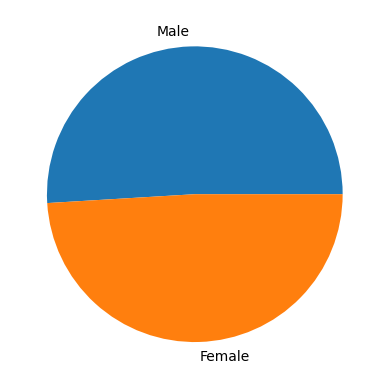

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female = study_data_clean["Sex"].value_counts()

plt.pie(male_v_female, labels=male_v_female.index)



#plt.title("# of Observed Mouse Timepoints per Drug Regiman")
#plt.ylabel("# of Observed Mouse Timepoints")

## Quartiles, Outliers and Boxplots

In [155]:
#Xpert Learning Assistant for help on part of this

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#list of drugs
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#DataFrame with only drugs in the list
reduced_df = study_data_clean[study_data_clean["Drug Regimen"].isin(drugs)]
max_timepoint_tumor_volumes = []
max_timepoint_list = []
mouse_id_list = []
max_drug_list = []
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = reduced_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoints
# Assuming 'max_timepoints' contains the maximum timepoints for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


for mouse_id, max_timepoint in max_timepoints.items():
    tumor_volume = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Tumor Volume (mm3)'].values[0]
    drug_name = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Drug Regimen'].values[0]
    max_timepoint_tumor_volumes.append(tumor_volume)
    max_timepoint_list.append(max_timepoint)
    mouse_id_list.append(mouse_id)
    max_drug_list.append(drug_name)
max_timepoint_tumor_volumes

max_timepoints_df = pd.DataFrame({"Mouse ID": mouse_id_list, 
                                  "Max Timepoint": max_timepoint_list, 
                                  "Tumor Volume at Max Timepoint": max_timepoint_tumor_volumes, 
                                  "Drug Regimen": max_drug_list})
max_timepoints_df

,Mouse ID,Max Timepoint,Tumor Volume at Max Timepoint,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
max_timepoint_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
